In [2]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (1).csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']


In [6]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [9]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Support Vector Machine Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0

In [11]:
best_model = LogisticRegression()
best_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [12]:
def classify_sms(message):
    message_tfidf = tfidf_vectorizer.transform([message])
    prediction = best_model.predict(message_tfidf)
    return "spam" if prediction[0] == 1 else "legitimate"

spam_count = data['label'].value_counts()[1]
legitimate_count = data['label'].value_counts()[0]


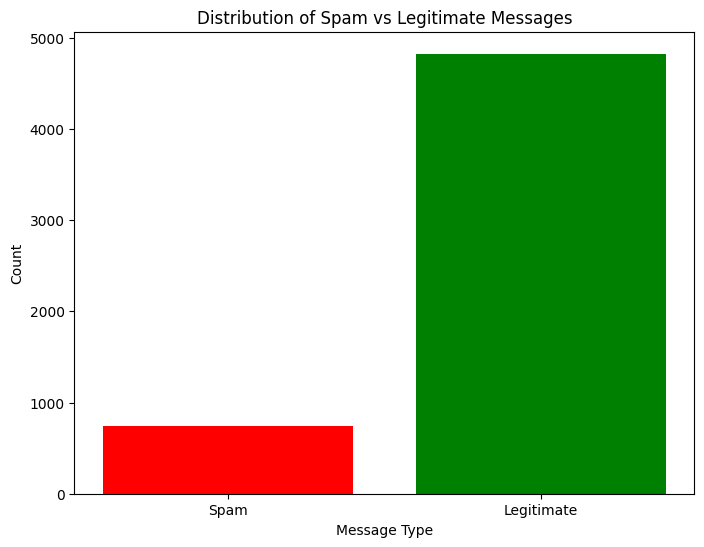

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(['Spam', 'Legitimate'], [spam_count, legitimate_count], color=['red', 'green'])
plt.title('Distribution of Spam vs Legitimate Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()